<h1><center><span style="color:#694ED6">Fusion </span><span style="color:#C137A2">CreditSense</span></center></h1>
<h2>About:</h2>
<p>In this notebook we will be going through the machine learning side of our Proof-of-Concept solution that our team developed for Finastra's Hack to the Future 2020 Hackathon. Our solution aims to help credit-disadvantaged consumers gain more access to financial products by analyzing a user's transaction history. We'll go step-by-step through the whole process, from reading in data all the way to serializing our machine learning model into a file that we will be able to utilize. </p>
<p>Note: This project is an extension of a former Hackathon project that predicted a credit score based on a user's transaction history. We expanded it further and developed another maching learning model to predict a small-dollar credit line, which could help stuggling households pay for unexpected expenses or emergencies. Much of the code is adapted from the data scientist from the first hackathon team: Kareem Zedan, https://github.com/KZedan</p>

## Imports

In [1]:
import pandas as pd
import glob
import ast
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import altair as alt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load data from files to Dataframe

In [2]:
def load_from_folder(folder="../data/3_fake76/"):
    '''Load all the json files in a given directory into a dataframe.'''
    files = glob.glob(folder + "*.json")
    dfl = None
    for fn in files:
        print(fn)
        df =  load_to_df(fn)
        ref = fn.replace(folder, "").replace(".json", "")
        df["reference"] = ref
        if dfl is None:
            dfl = df
        else:
            dfl = dfl.append(df)
    return dfl

In [3]:
def load_to_df(file = "./data/data_2020_09_22_sm.json"):
    '''Loads data from a file (as text in dict list / json format) an returns a dataframe with dtypes defined.'''
    
    # load from file
    print("Loading file" , file)
    with open(file, "r") as f:
        txt=f.read()
    txt = txt.replace("null", "None")
    # print(txt[:100])
    
    # text to object
    l = ast.literal_eval(txt)
    
    # create dataframe
    df = pd.DataFrame(l)
    
    # set data types
    d = {"amount": "float64", 
           "currency": "category",
           "transaction_type": "category",
           "status": "category",
           "description": "category",
           "bank_transaction_code": "category",
           "bank_transaction_issuer": "category",
           # "booking_datetime": "datetime64"
          }
    df = df.astype(d)
    return df

In [4]:
df1 = load_from_folder(folder="./data/3_fake76/")

./data/3_fake76/BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ.json
Loading file ./data/3_fake76/BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ.json
./data/3_fake76/gnPMQOmN-Xw7l-O0QP-xPJg-sGTKkSl1pcqc.json
Loading file ./data/3_fake76/gnPMQOmN-Xw7l-O0QP-xPJg-sGTKkSl1pcqc.json
./data/3_fake76/hNdGX1Gb-K0al-AHAT-QJ9Y-PI3DbW16f5eU.json
Loading file ./data/3_fake76/hNdGX1Gb-K0al-AHAT-QJ9Y-PI3DbW16f5eU.json
./data/3_fake76/1twYoddm-ItJE-HMB6-AYyx-Xwd1RNFN6Ge1.json
Loading file ./data/3_fake76/1twYoddm-ItJE-HMB6-AYyx-Xwd1RNFN6Ge1.json
./data/3_fake76/ATmwo1sa-MdGF-8jPn-JYne-uUbKFhcHQRQu.json
Loading file ./data/3_fake76/ATmwo1sa-MdGF-8jPn-JYne-uUbKFhcHQRQu.json
./data/3_fake76/qHffYUmB-PnCc-9Ghv-vHuq-DQxeyrpstlyh.json
Loading file ./data/3_fake76/qHffYUmB-PnCc-9Ghv-vHuq-DQxeyrpstlyh.json
./data/3_fake76/1OkNgAYE-mw28-3amh-68ub-JMYSVnY5jouO.json
Loading file ./data/3_fake76/1OkNgAYE-mw28-3amh-68ub-JMYSVnY5jouO.json
./data/3_fake76/2oEc2wrU-DecT-V97Z-b4pp-44cRGch4skHG.json
Loading file ./data/3_fake76/2oEc2wrU-D

./data/3_fake76/tLJnxKro-ohLO-HpMb-V34l-ewokqrNgxLiD.json
Loading file ./data/3_fake76/tLJnxKro-ohLO-HpMb-V34l-ewokqrNgxLiD.json
./data/3_fake76/dgAymPkU-fwMI-Wzhq-vKm7-SllZZTdgqMAG.json
Loading file ./data/3_fake76/dgAymPkU-fwMI-Wzhq-vKm7-SllZZTdgqMAG.json
./data/3_fake76/FdEpKljA-phKY-mpqM-bNoe-NdkW39SeNYQG.json
Loading file ./data/3_fake76/FdEpKljA-phKY-mpqM-bNoe-NdkW39SeNYQG.json
./data/3_fake76/HtuW44ez-fHso-pFuM-c0Uq-crjT9ahFZp62.json
Loading file ./data/3_fake76/HtuW44ez-fHso-pFuM-c0Uq-crjT9ahFZp62.json
./data/3_fake76/Khqk5Kto-NI7i-4XQR-PO6R-Jbz98YyHFsoY.json
Loading file ./data/3_fake76/Khqk5Kto-NI7i-4XQR-PO6R-Jbz98YyHFsoY.json
./data/3_fake76/t2ecogdz-NoHf-pS73-e1vS-15KTrNIIo3WI.json
Loading file ./data/3_fake76/t2ecogdz-NoHf-pS73-e1vS-15KTrNIIo3WI.json
./data/3_fake76/sNIcQsYJ-CeaT-kxOS-HGf6-OFYzA3iLEjdm.json
Loading file ./data/3_fake76/sNIcQsYJ-CeaT-kxOS-HGf6-OFYzA3iLEjdm.json
./data/3_fake76/JifMFDCm-jbHn-Ro3w-5hKB-C8KN2Ge8Ovha.json
Loading file ./data/3_fake76/JifMFDCm-j

In [5]:
df1.head()

,merchant_name,merchant_category_code,remittance_info,address,reference,note,status,bank_transaction_issuer,description,transaction_type,currency,value_datetime,booking_datetime,bank_transaction_code,amount
0,,,,,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,NG2,BOOKED,HFX,ZY3,Debit,GBP,None,2020-09-12T6:00:00:0:25:00:0:00:23,DS,-78.82
1,,,,,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,ZS1,BOOKED,RBS,FA1,Debit,GBP,None,2020-07-20T10:00:00:0:16:00:0:00:42,HC,-151.32
2,,,,,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,WT5,BOOKED,RBS,CC7,Debit,GBP,None,2020-03-28T11:00:00:0:08:00:0:00:56,TZ,1147.00
3,,,,,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,XZ7,BOOKED,LBG,DI7,Debit,GBP,None,2020-07-13T9:00:00:0:46:00:0:00:02,DS,952.00
4,,,,,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,FC4,BOOKED,HFX,DU5,Debit,GBP,None,2020-05-07T0:00:00:0:24:00:0:00:51,GU,-1156.16


## Exploratory Data Analysis (EDA)

In [41]:
bank_issuers=df1['bank_transaction_issuer'].value_counts().to_frame().reset_index().rename(columns={'index':'Issuer','bank_transaction_issuer':'count'})
alt.Chart(bank_issuers).mark_bar(color="#99D79C").encode(
    x='Issuer:N',
    y='count:Q',
    tooltip=['Issuer','count']
).properties(height=400,width=600,title="Bank Transaction Issuers")

alt.Chart(...)

In [50]:
top_transaction_codes=df1['bank_transaction_code'].value_counts().to_frame().reset_index().rename(columns={'index':'Transaction Code','bank_transaction_code':'count'})[:5]
alt.Chart(top_transaction_codes).mark_bar(color="#99CED7").encode(
    x='Transaction Code:N',
    y='count:Q',
    tooltip=['Transaction Code','count']
).properties(height=400,width=600,title="Top 20 Bank Transaction Codes")

alt.Chart(...)

In [58]:
line = alt.Chart(df1).mark_line(
    color='red',
    size=3
).transform_window(
    rolling_mean='mean(amount)',
    frame=[-15, 15]
).encode(
    x='booking_date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(df1).mark_point().encode(
    x='booking_date',
    y=alt.Y('amount',axis=alt.Axis(title='Amount')),
    tooltip=[alt.Tooltip('booking_date'),
            alt.Tooltip('amount')]
).properties(title="Amount per Transaction with Rolling Mean",width=600,height=400)

points + line

alt.LayerChart(...)

In [57]:
df1.describe()

,amount
count,2341.000000
mean,-482.699663
std,730.052764
min,-1506.890000
25%,-1062.000000
50%,-590.290000
75%,-135.970000
max,1504.150000


In [8]:
df = df1.copy()

In [9]:
for col in df.columns:
    print()
    print(col)
    print(df[col].value_counts())


merchant_name
    2341
Name: merchant_name, dtype: int64

merchant_category_code
    2341
Name: merchant_category_code, dtype: int64

remittance_info
    2341
Name: remittance_info, dtype: int64

address
    2341
Name: address, dtype: int64

reference
KuKniQ06-VTrj-totz-dZHM-eOq161UKoMTk    58
BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ    56
N00FHv2H-KVQq-87HD-cz3V-gpHUm7YZynn8    53
fhsPifTZ-M7uQ-SRHT-OxsN-XwvipkkMR0q2    51
W6tQYlcR-bjb0-GJ8W-A7do-6am6fYtQPk7A    51
KBxWJyfu-VOnJ-kP6r-QXXQ-vQPFLGFdzkto    51
OpICCNeZ-UYMT-sYpH-qJ2F-LZ9DeCAqBr6Q    51
Vmcb5Of4-jgN8-Obdw-vBUI-ZdlCqJa8pCh8    50
wdvBJBjf-4vph-LFtS-gVBS-FIaUSzIZ11oO    49
5DM0iVMX-Pae8-uwWl-EXZl-tVcX9eyMWMjO    49
pttRxkDR-DHKA-F9Pv-ewsk-pzRVWHtM3xLs    49
KK3ENN3i-uGRu-3dPJ-AVAI-irNTu3g4Id2l    48
tLJnxKro-ohLO-HpMb-V34l-ewokqrNgxLiD    47
jt8h8CTj-J6cx-jDkh-i4nM-DrFLmsmEcbzU    46
WQ33EVmU-W01n-Yx0R-BgFk-1jzUEPJ66Yff    45
YdB1O3OP-GsfA-8w0V-jkIJ-dRvHG3Eix2hw    45
Khqk5Kto-NI7i-4XQR-PO6R-Jbz98YyHFsoY    45
32XVlwUC-AUf5-rK

In [61]:
df.columns

Index(['merchant_name', 'merchant_category_code', 'remittance_info', 'address',
       'reference', 'note', 'status', 'bank_transaction_issuer', 'description',
       'transaction_type', 'currency', 'value_datetime', 'booking_datetime',
       'bank_transaction_code', 'amount'],
      dtype='object')

## Feature Selection + Feature Engineering

In [6]:
def return_selected_features(df):
    '''Choose subset of features and convert the booking date to datetime object'''
    features = ['reference', 'amount', 'booking_datetime', 'bank_transaction_code', 'description']
    df = df[features]
    new = df['booking_datetime'].str.split("T", n = 1, expand = True)
    df['booking_date'] = new[0]
    df = df.drop(columns = ['booking_datetime'])
    df['booking_date'] = pd.to_datetime(df['booking_date'])
    return df

In [10]:
df1 = return_selected_features(df)
df1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reference,amount,bank_transaction_code,description,booking_date
0,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,-78.82,DS,ZY3,2020-09-12
1,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,-151.32,HC,FA1,2020-07-20
2,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,1147.00,TZ,CC7,2020-03-28
3,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,952.00,DS,DI7,2020-07-13
4,BV9xTSkC-wb8L-sbsN-huzh-GdPkQiR8bzdJ,-1156.16,GU,DU5,2020-05-07
...,...,...,...,...,...
22,2RO5dtBq-YB7C-N60r-OyIF-hzYV8YifQEMU,-140.26,DD,MO7,2020-08-28
23,2RO5dtBq-YB7C-N60r-OyIF-hzYV8YifQEMU,-432.62,DD,LO4,2020-03-26
24,2RO5dtBq-YB7C-N60r-OyIF-hzYV8YifQEMU,-766.27,ZQ,TB3,2020-12-05
25,2RO5dtBq-YB7C-N60r-OyIF-hzYV8YifQEMU,1310.47,DD,TN2,2020-02-20


In [11]:
def aggregate_and_add_transaction_codes(df):
    '''Aggregate the transactions by each reference ID.'''
    pd.MultiIndex.from_frame(df)
    aggs = {
    'reference':['count'],
    'amount': ['sum', 'min', 'max', 'mean', 'std'],
    'booking_date': ['max']}
    #next list is output of predictions from the credit scoring model
    credit = [0.7992785634948782, 0.7986569930904067, 0.669705871321802, 0.5677780109256134, 0.7829450238624338, 0.9065854730735815, 0.8684110570998242, 0.8998606070851429, 0.8877712865274161, 0.8325068993663756, 0.7744068474628845, 0.5756333175817332, 0.8060075866144963, 0.9134186697824103, 0.9165086902509654, 0.694578331673692, 0.8938286359993027, 0.9348896935794414, 0.9084484716216223, 0.9131797093686264, 0.7238466475994452, 0.8769859324769198, 0.9054524070937794, 0.727793068993923, 0.902649605578004, 0.8891874202935185, 0.9301788612229976, 0.8068785746859495, 0.8394414628075328, 0.9059935098669412, 0.9071526991854544, 0.737761475988364, 0.8833165663235609, 0.6095835823622809, 0.9050983716301768, 0.9085909354733849, 0.881890085447055, 0.9035399628583979, 0.8658244240301246, 0.5919882902040193, 0.9053702112639042, 0.8963132304969369, 0.882928698756489, 0.9109057296473924, 0.9012792075251085, 0.8668952413149258, 0.930135197297519, 0.5714513640350055, 0.7093295707490119, 0.7994526548336672, 0.8608779637188021, 0.9208497907941222, 0.8853862531520182, 0.9129544254716385, 0.6942264534715965, 0.6163427929251517, 0.9059058600294649, 0.8996466107429221, 0.7727407613843315, 0.891920415413264, 0.9158878477189881, 0.8712817587611942, 0.9007403825338232, 0.7851000064228911, 0.5673096624506131, 0.919675843390262, 0.6776866656180021, 0.9086780447550192, 0.9157106435620919, 0.905906007350962, 0.8201714334306436, 0.900556331767615, 0.6839650870178858, 0.9013253963680739, 0.768923119835791, 0.9041158923979601]
    df_agg = df.groupby(['reference',pd.Grouper(key='booking_date', freq='1Y')]).agg(aggs)
    df_agg.columns = df_agg.columns.get_level_values(0) + "_" + df_agg.columns.get_level_values(1)
    df_agg2 = df.groupby('reference').agg({"bank_transaction_code": lambda tdf: tdf.unique().tolist()})
    agg_df = df_agg.join(df_agg2)
    agg_df = agg_df.reset_index()
    agg_df['credit_score'] = pd.Series()
    agg_df['credit_score'] = credit
    return agg_df

In [12]:
df2 = aggregate_and_add_transaction_codes(df1)
df2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,reference,booking_date,reference_count,amount_sum,amount_min,amount_max,amount_mean,amount_std,booking_date_max,bank_transaction_code,credit_score
0,0mIoPs3s-2IoS-33Go-WPFW-GmUhPios4Thc,2020-12-31,8,-3623.87,-1228.95,1201.08,-452.983750,761.120824,2020-11-29,"[DD, NE, CR, SO, UG, AV, SQ, DE]",0.799279
1,1OkNgAYE-mw28-3amh-68ub-JMYSVnY5jouO,2020-12-31,23,-8561.86,-1451.32,1390.91,-372.254783,944.388324,2020-12-27,"[BN, ZF, DG, RA, MX, SO, DC, TT, BJ, XD, OW, D...",0.798657
2,1twYoddm-ItJE-HMB6-AYyx-Xwd1RNFN6Ge1,2020-12-31,17,-12047.77,-1463.36,420.47,-708.692353,580.234537,2020-12-16,"[UY, CR, GS, DD, XA, YD, JE, AT, VB, LJ, DT, M...",0.669706
3,27EWzwhF-t14h-0xlF-sef7-bMYTWaRrHMZu,2020-12-31,14,-3026.45,-1441.23,1481.74,-216.175000,917.404587,2020-12-13,"[OB, FB, DD, UV, QL, SO, AK, ME, VD, FG, TL, A...",0.567778
4,2RO5dtBq-YB7C-N60r-OyIF-hzYV8YifQEMU,2020-12-31,27,-18041.72,-1486.56,1310.47,-668.211852,548.383962,2020-12-05,"[SE, UO, CR, CK, EO, CQ, ZD, MG, WS, YA, DD, J...",0.782945
5,2oEc2wrU-DecT-V97Z-b4pp-44cRGch4skHG,2020-12-31,35,-13867.20,-1447.32,1457.26,-396.205714,794.110609,2020-12-29,"[SO, QD, LW, CR, DD, WX, LC, XH, JZ, HL, BK, X...",0.906585
6,32XVlwUC-AUf5-rKX1-nnSN-35WW1lq0yfU1,2020-12-31,45,-27398.84,-1494.81,1438.32,-608.863111,652.623179,2020-12-27,"[AJ, UL, XK, GI, BS, PW, SO, TM, OW, GC, NT, W...",0.868411
7,5DM0iVMX-Pae8-uwWl-EXZl-tVcX9eyMWMjO,2020-12-31,49,-23252.04,-1454.03,1462.59,-474.531429,717.722709,2020-12-23,"[SZ, RV, MJ, QE, RZ, VG, ND, TH, DD, AC, VL, N...",0.899861
8,5UAy0df0-TwVx-YwHc-JZDL-6OgGM4r1tIz9,2020-12-31,36,-19291.98,-1461.70,1353.06,-535.888333,719.059938,2020-12-07,"[SO, RL, OD, UQ, CS, RZ, NO, OE, DD, DF, IZ, I...",0.887771
9,5zI4opWX-UMWz-yF1J-HAVI-WDV5GUlXJwfH,2020-12-31,34,-15247.40,-1482.91,1490.23,-448.452941,832.190655,2020-12-26,"[DD, JJ, UE, CR, WK, OX, GR, PB, HN, SQ, EK, P...",0.832507


In [17]:
alt.Chart(df2).mark_bar().encode(
    alt.X("reference_count:Q"),
    y='count()',
).properties(
    width=600,
    height=400,title="Distribution of Total number of Transactions")

alt.Chart(...)

Text(0.5, 1.0, 'credit score distribution')

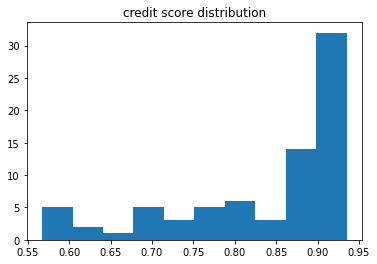

In [70]:
plt.hist(df2['credit_score'])
plt.title('credit score distribution')

In [71]:
def transform(df):
    '''Transform to numbers. Self made one hot encoding.'''
    # print(df)
    # btc = {'SO', 'BGC', 'PAY', '1', 'CR', 'DEP', 'DD', '30'}
    btc = {'SO', 'DD', 'CR', 'YE', 'HL', 'PN', 'NJ', 'OW', 'DS', 'WB', 'VI', 'MT',
       'IV', 'FR', 'EO', 'QL', 'EK', 'UB', 'OL', 'DF', 'MG', 'XL', 'WK', 'DP',
       'ZF', 'PQ', 'YK', 'OC', 'FH', 'DJ', 'YT', 'HH'}
    btcs = df["bank_transaction_code"].to_list()
    # print(btcs)
    d = dict()
    for c in btc:
        l = list()
        for l2 in btcs:
            l.append(1 if c in l2 else 0)
        d[c] = l
    dfr = pd.DataFrame.from_records(d, index=df.index)
    dfr = dfr.join(df)
    dfr.drop(columns=["bank_transaction_code"], inplace=True)
    return dfr

In [72]:
def generate_label(df, with_bias=False):
    """Generate a biased 'score' and add to dataframe"""
    dfr = df.copy()
    # dfr["y"] = np.random.uniform(0, 0.7, len(dfl))
    dfr['credit_line'] = 5

    # Generate some non-random bias
    # DD, SO, CR is positive
    # Sum ammount over DD, CR, SO if pos more trustworthy
    if with_bias:
        cond = (dfr['DD'] > 0.5)
        dfr.loc[cond, ['credit_line']] = dfr['credit_line'] + 0.5
        
        cond = (dfr["CR"] > 0.5)
        dfr.loc[cond, ["credit_line"]] = dfr["credit_line"] + 0.5
        
        cond = (dfr["SO"] > 0.5)
        dfr.loc[cond, ["credit_line"]] = dfr["credit_line"] + 0.5
        
        cond = (dfr["amount_mean"] > 0)
        dfr.loc[cond, ["credit_line"]] = dfr["credit_line"] + 0.5

        cond = (dfr["amount_std"] > 900)
        dfr.loc[cond, ["credit_line"]] = dfr["credit_line"] - 0.5

        cond = (dfr["reference_count"] > 20)
        dfr.loc[cond, ["credit_line"]] = dfr["credit_line"] + 0.5
        
        cond = (dfr["credit_score"] > 0.75)
        dfr.loc[cond, ["credit_line"]] = dfr["credit_line"] + 0.5
        
        cond = (abs(dfr["amount_max"]) > (2*abs(dfr['amount_mean'])))
        dfr.loc[cond, ["credit_line"]] = dfr["credit_line"] + 0.5
        
    return dfr

In [73]:
x = transform(df2)

In [74]:
df_score = generate_label(x, with_bias = True)
df_score

,CR,DD,DF,DJ,DP,DS,EK,EO,FH,FR,...,booking_date,reference_count,amount_sum,amount_min,amount_max,amount_mean,amount_std,booking_date_max,credit_score,credit_line
0,1,1,0,0,0,0,0,0,0,0,...,2020-12-31,8,-3623.87,-1228.95,1201.08,-452.983750,761.120824,2020-11-29,0.799279,7.5
1,1,1,0,0,0,0,0,0,0,1,...,2020-12-31,23,-8561.86,-1451.32,1390.91,-372.254783,944.388324,2020-12-27,0.798657,7.5
2,1,1,0,0,0,0,0,0,0,0,...,2020-12-31,17,-12047.77,-1463.36,420.47,-708.692353,580.234537,2020-12-16,0.669706,6.0
3,0,1,0,0,0,0,0,0,0,0,...,2020-12-31,14,-3026.45,-1441.23,1481.74,-216.175000,917.404587,2020-12-13,0.567778,6.0
4,1,1,0,0,0,0,0,1,0,0,...,2020-12-31,27,-18041.72,-1486.56,1310.47,-668.211852,548.383962,2020-12-05,0.782945,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,1,0,0,1,0,0,0,0,...,2020-12-31,49,-20762.29,-1483.71,1347.98,-423.720204,683.909796,2020-12-19,0.900556,8.0
72,0,1,1,0,0,0,0,0,0,0,...,2020-12-31,18,-9951.39,-1486.95,1349.34,-552.855000,696.746101,2020-12-25,0.683965,6.5
73,1,1,0,0,0,0,0,0,0,0,...,2020-12-31,26,-12342.66,-1497.06,1444.76,-474.717692,755.468001,2020-12-22,0.901325,8.0
74,1,1,0,0,0,0,0,0,0,0,...,2020-12-31,21,-11736.70,-1458.39,1312.72,-558.890476,799.211640,2020-12-05,0.768923,7.5


Text(0.5, 1.0, 'credit line distribution')

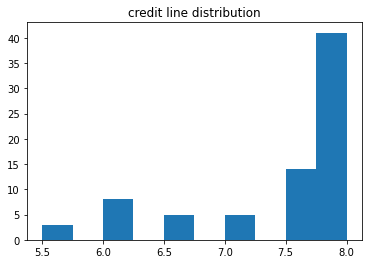

In [75]:
plt.hist(df_score['credit_line'])
plt.title('credit line distribution')

In [76]:
def assign_credit_label(df):
    new = []
    y = df['credit_line'].to_list()
    for i in y:
        if i < 6:
            label = 400
            new.append(label)
        elif (i >= 6) & (i < 7):
            label = 600
            new.append(label)
        elif (i >= 7) & (i < 8):
            label = 800
            new.append(label)
        else:
            label = 1000
            new.append(label)
    df['credit_line'] = pd.Series()
    df['credit_line'] = new
    return df

In [77]:
df_train = assign_credit_label(df_score)

[7.5, 7.5, 6.0, 6.0, 7.0, 8.0, 8.0, 8.0, 8.0, 7.5, 7.0, 5.5, 7.5, 8.0, 8.0, 6.5, 8.0, 8.0, 7.5, 7.5, 6.5, 8.0, 8.0, 6.0, 8.0, 8.0, 8.0, 7.5, 7.5, 8.0, 8.0, 6.0, 8.0, 6.0, 7.5, 8.0, 8.0, 8.0, 8.0, 5.5, 8.0, 8.0, 8.0, 7.5, 7.5, 8.0, 8.0, 6.0, 6.5, 7.0, 8.0, 8.0, 8.0, 8.0, 6.0, 6.0, 8.0, 8.0, 7.0, 8.0, 8.0, 8.0, 7.5, 7.5, 5.5, 8.0, 6.5, 8.0, 8.0, 8.0, 7.0, 8.0, 6.5, 8.0, 7.5, 8.0]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [78]:
df_train.set_index('reference', inplace=True)

In [79]:
df_train2 = df_train.copy()

In [80]:
df_train2 = df_train2.drop(columns = ['booking_date', 'booking_date_max'])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train2.iloc[:,:-1], df_train2.iloc[:,-1:], test_size=0.2, random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=42, n_estimators=40)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=20, n_estimators=40, random_state=42)

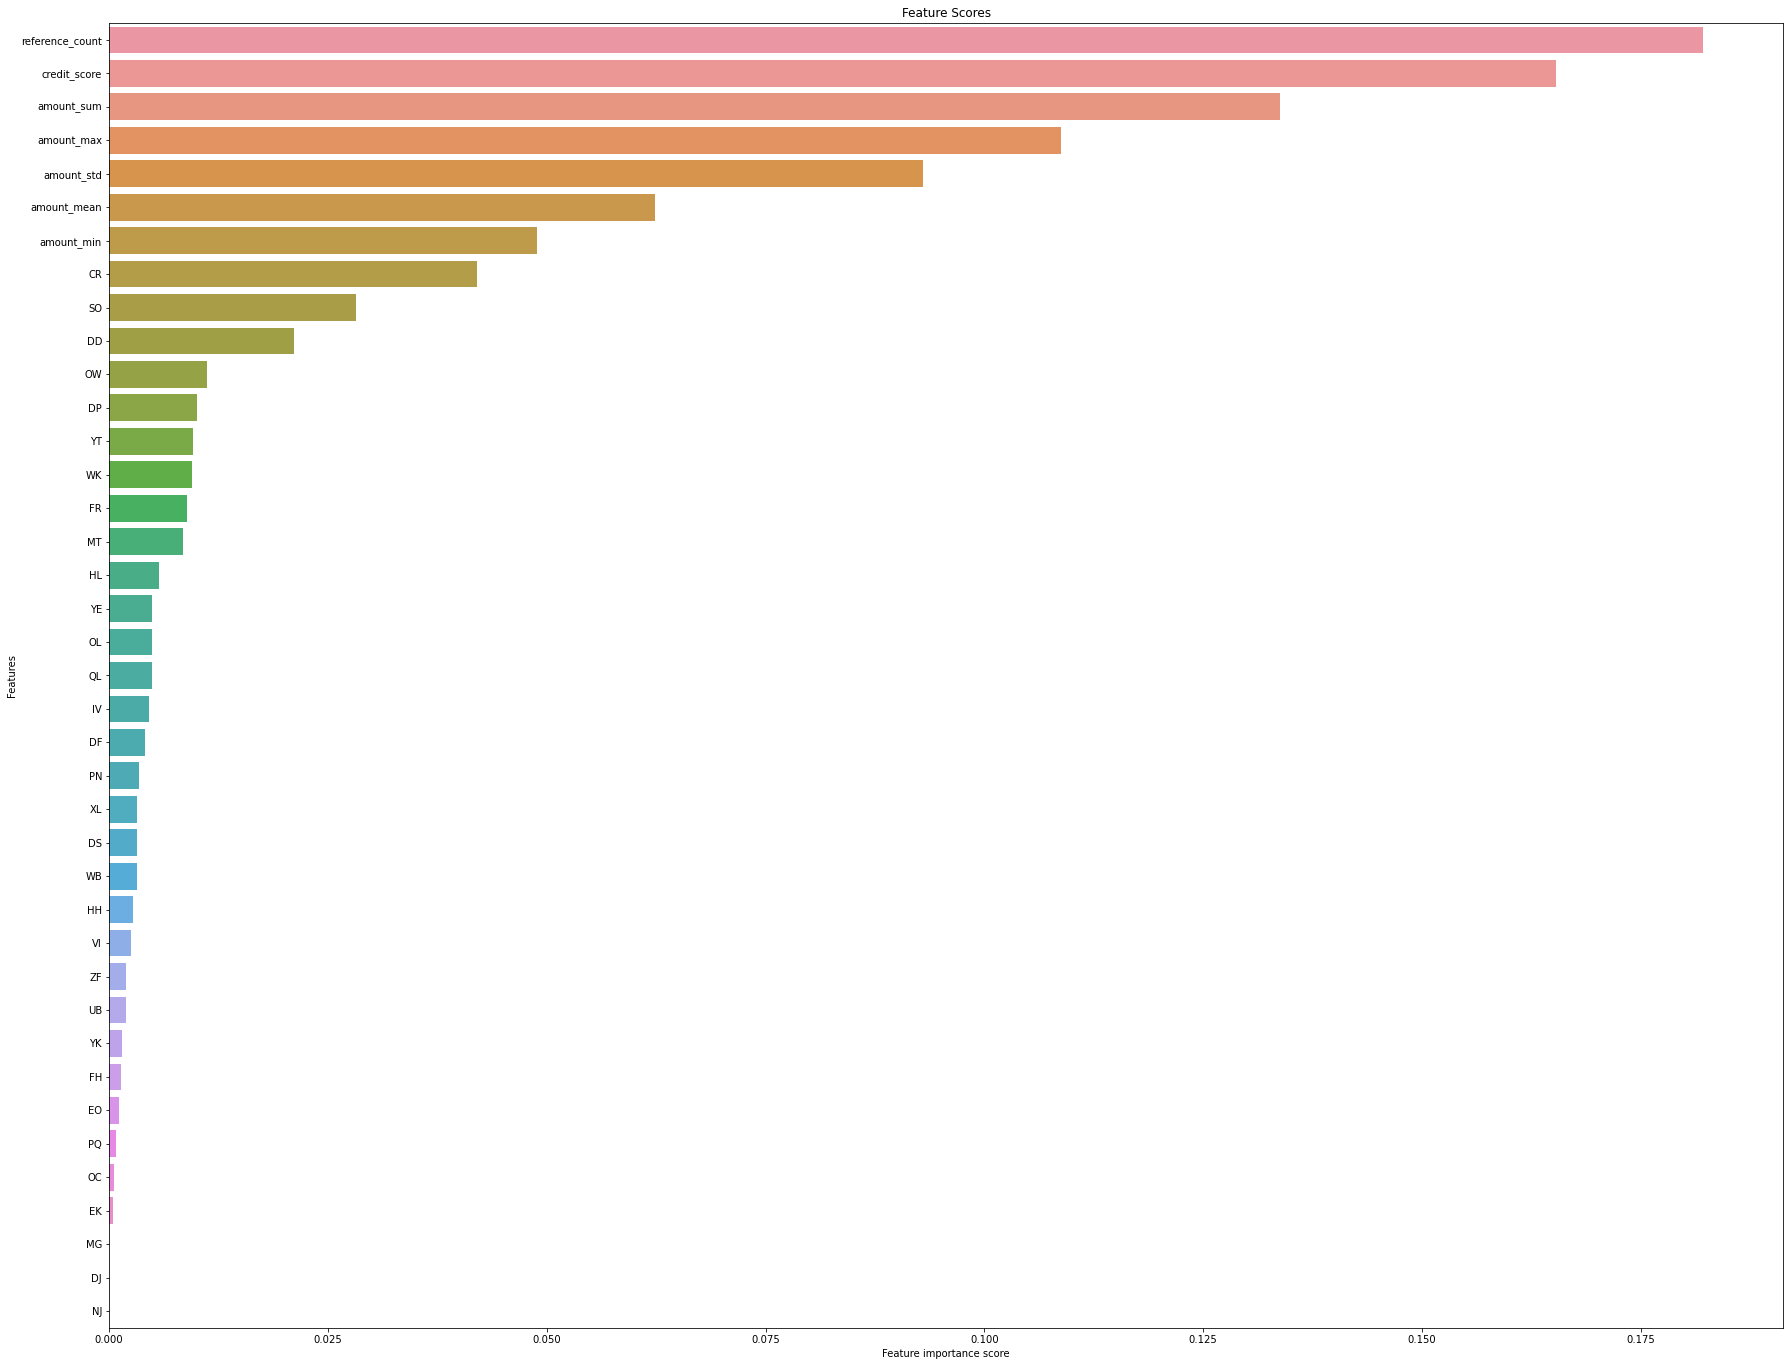

In [83]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Feature Scores")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [84]:
y_pred = clf.predict(X_test)
y_pred

array([ 800, 1000,  600,  600, 1000,  600, 1000, 1000, 1000, 1000, 1000,
        800, 1000,  800,  800,  600])

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         600       0.50      1.00      0.67         2
         800       1.00      0.50      0.67         8
        1000       0.75      1.00      0.86         6

    accuracy                           0.75        16
   macro avg       0.75      0.83      0.73        16
weighted avg       0.84      0.75      0.74        16



In [90]:
import joblib
filename = 'FusionCreditSenseCLF.pkl'
_ = joblib.dump(clf,filename)

In [88]:
# import pickle

In [89]:
# with open('FusionCreditSenseCLF.pkl', 'wb') as dump_var:
#     pickle.dump(clf, dump_var)